In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [3]:
#import dataset,set the independent and dependent variables

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data.csv")

In [4]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [5]:
x = df.iloc[:,:-1]
x

,Country,Age,Salary
0,France,44.0,72000.0
1,Spain,27.0,48000.0
2,Germany,30.0,54000.0
3,Spain,38.0,61000.0
4,Germany,40.0,NaN
5,France,35.0,58000.0
6,Spain,NaN,52000.0
7,France,48.0,79000.0
8,Germany,50.0,83000.0
9,France,37.0,67000.0


In [6]:
y = df.iloc[:,3]
y

0     No
1    Yes
2     No
3     No
4    Yes
5    Yes
6     No
7    Yes
8     No
9    Yes
Name: Purchased, dtype: object

In [7]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [8]:
!pip install sklearn

In [9]:
# Convert  NaN TO NP.NAN
df[df == 'NaN'] = np.nan
x

,Country,Age,Salary
0,France,44.0,72000.0
1,Spain,27.0,48000.0
2,Germany,30.0,54000.0
3,Spain,38.0,61000.0
4,Germany,40.0,NaN
5,France,35.0,58000.0
6,Spain,NaN,52000.0
7,France,48.0,79000.0
8,Germany,50.0,83000.0
9,France,37.0,67000.0


In [10]:
#Removing missing values using imputer package
#uses mean of each column to replace the  missing values

#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
imputer  = SimpleImputer(missing_values = np.nan, strategy = 'mean')


imputer = imputer.fit(x.iloc[:,1:3])

x.iloc[:, 1:3] = imputer.transform(x.iloc[:, 1:3])


In [11]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


Encode categorical data,column index 1 for countries and column 4 for purchased

In [12]:
df['Country']

0     France
1      Spain
2    Germany
3      Spain
4    Germany
5     France
6      Spain
7     France
8    Germany
9     France
Name: Country, dtype: object

In [13]:
x.iloc[:,0] 

0     France
1      Spain
2    Germany
3      Spain
4    Germany
5     France
6      Spain
7     France
8    Germany
9     France
Name: Country, dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

LabelEncoder_x = LabelEncoder()

#converted the countries to numerical data,use one hot encoder& column transformer to avoid bias

x.iloc[:,0] =  LabelEncoder_x.fit_transform(x.iloc[:,0])

columnTrans = ColumnTransformer([("Country", OneHotEncoder(), [0])], remainder = 'passthrough')
x = columnTrans.fit_transform(x)


In [15]:
LabelEncoder_y = LabelEncoder()
y = LabelEncoder_y.fit_transform(y)


In [16]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [17]:
x

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.40000000e+01,
        7.20000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.70000000e+01,
        4.80000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.00000000e+01,
        5.40000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.80000000e+01,
        6.10000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.00000000e+01,
        6.37777778e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.50000000e+01,
        5.80000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.87777778e+01,
        5.20000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.80000000e+01,
        7.90000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 5.00000000e+01,
        8.30000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.70000000e+01,
        6.70000000e+04]])

In [18]:
#SPLIT TRAINING DATA 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0)
print("X_train:",X_train,'\n','\n',
      "X_test:" ,X_test ,'\n','\n',
      "y_train:",y_train,'\n','\n', 
      "y_test:",y_test)

X_train: [[0.00000000e+00 1.00000000e+00 0.00000000e+00 4.00000000e+01
  6.37777778e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 3.70000000e+01
  6.70000000e+04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 2.70000000e+01
  4.80000000e+04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 3.87777778e+01
  5.20000000e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 4.80000000e+01
  7.90000000e+04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 3.80000000e+01
  6.10000000e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 4.40000000e+01
  7.20000000e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 3.50000000e+01
  5.80000000e+04]] 
 
 X_test: [[0.0e+00 1.0e+00 0.0e+00 3.0e+01 5.4e+04]
 [0.0e+00 1.0e+00 0.0e+00 5.0e+01 8.3e+04]] 
 
 y_train: [1 1 1 0 1 0 0 1] 
 
 y_test: [0 0]


SCALE TO MAKE THE VALUES UNIFORM

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print("X_train:",X_train,'\n','\n',
      "X_test:" ,X_test ,'\n','\n',
      "y_train:",y_train,'\n','\n', 
      "y_test:",y_test)

X_train: [[-1.          2.64575131 -0.77459667  0.26306757  0.12381479]
 [ 1.         -0.37796447 -0.77459667 -0.25350148  0.46175632]
 [-1.         -0.37796447  1.29099445 -1.97539832 -1.53093341]
 [-1.         -0.37796447  1.29099445  0.05261351 -1.11141978]
 [ 1.         -0.37796447 -0.77459667  1.64058505  1.7202972 ]
 [-1.         -0.37796447  1.29099445 -0.0813118  -0.16751412]
 [ 1.         -0.37796447 -0.77459667  0.95182631  0.98614835]
 [ 1.         -0.37796447 -0.77459667 -0.59788085 -0.48214934]] 
 
 X_test: [[ 0.  0.  0. -1. -1.]
 [ 0.  0.  0.  1.  1.]] 
 
 y_train: [1 1 1 0 1 0 0 1] 
 
 y_test: [0 0]


SIMPLE LINEAR REGRESSION

In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Regression/Section 6 - Simple Linear Regression/Python/Salary_Data.csv")

In [21]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [22]:
x = df['YearsExperience'].values
x= x.reshape(-1,1)

y = df['Salary'].values
y= y.reshape(-1,1)
print(x)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[[ 39343.]
 [ 46205.]
 [ 37731.]
 [ 43525.]
 [ 39891.]
 [ 56642.]
 [ 60150.]
 [ 54445.]
 [ 64445.]
 [ 57189.]
 [ 63218.]
 [ 55794.]
 [ 56957.]
 [ 57081.]
 [ 61111.]
 [ 67938.]
 [ 66029.]
 [ 83088.]
 [ 81363.]
 [ 93940.]
 [ 91738.]
 [ 98273.]
 [101302.]
 [113812.]
 [109431.]
 [105582.]
 [116969.]
 [112635.]
 [122391.]
 [121872.]]


In [23]:
from numpy.ma.core import size
size(y)

30

SPLITING

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size= 1/3, random_state=0)
print("X_train:",X_train,'\n','\n',
      "X_test:" ,X_test ,'\n','\n',
      "y_train:",y_train,'\n','\n', 
      "y_test:",y_test)

X_train: [[ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]] 
 
 X_test: [[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]
 [ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]] 
 
 y_train: [[ 56642.]
 [ 66029.]
 [ 64445.]
 [ 61111.]
 [113812.]
 [ 91738.]
 [ 46205.]
 [121872.]
 [ 60150.]
 [ 39891.]
 [ 81363.]
 [ 93940.]
 [ 57189.]
 [ 54445.]
 [105582.]
 [ 43525.]
 [ 39343.]
 [ 98273.]
 [ 67938.]
 [ 56957.]] 
 
 y_test: [[ 37731.]
 [122391.]
 [ 57081.]
 [ 63218.]
 [116969.]
 [109431.]
 [112635.]
 [ 55794.]
 [ 83088.]
 [101302.]]


In [25]:
"""#SCALE TO MAKE THE VALUES UNIFORM
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print("X_train:",X_train,'\n','\n',
      "X_test:" ,X_test ,'\n','\n',
      "y_train:",y_train,'\n','\n', 
      "y_test:",y_test)
      """

'#SCALE TO MAKE THE VALUES UNIFORM\nfrom sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\n\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.fit_transform(X_test)\nprint("X_train:",X_train,\'\n\',\'\n\',\n      "X_test:" ,X_test ,\'\n\',\'\n\',\n      "y_train:",y_train,\'\n\',\'\n\', \n      "y_test:",y_test)\n      '

In [26]:
from sklearn.linear_model import LinearRegression 

regressor  = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [27]:
#PREDICTING
y_pred = regressor.predict(X_test)
print(y_pred)
print(y_test)

[[ 40835.10590871]
 [123079.39940819]
 [ 65134.55626083]
 [ 63265.36777221]
 [115602.64545369]
 [108125.8914992 ]
 [116537.23969801]
 [ 64199.96201652]
 [ 76349.68719258]
 [100649.1375447 ]]
[[ 37731.]
 [122391.]
 [ 57081.]
 [ 63218.]
 [116969.]
 [109431.]
 [112635.]
 [ 55794.]
 [ 83088.]
 [101302.]]


In [28]:
x_pred = regressor.predict(y_test)
print(x_pred) 
print(X_test)

[[3.52658571e+08]
 [1.14388606e+09]
 [5.33502557e+08]
 [5.90858606e+08]
 [1.09321236e+09]
 [1.02276264e+09]
 [1.05270704e+09]
 [5.21474329e+08]
 [7.76562482e+08]
 [9.46789478e+08]]
[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]
 [ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]]


In [29]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

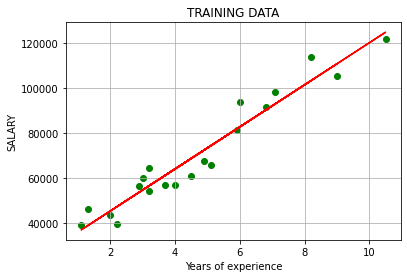

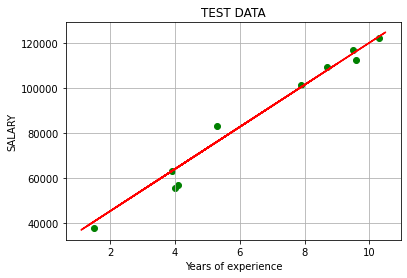

In [30]:
#visualize

#TRaining
plt.scatter(X_train,y_train, color="green")
 
plt.plot(X_train,regressor.predict(X_train), color="red") 
plt.title('TRAINING DATA')
plt.xlabel('Years of experience')
plt.ylabel('SALARY')
plt.grid()
plt.show()



#Predictions
plt.scatter(X_test,y_test, color="green")
 
plt.plot(X_train,regressor.predict(X_train), color="red") 
plt.title('TEST DATA')
plt.xlabel('Years of experience')
plt.ylabel('SALARY')
plt.grid()
plt.show()



#MULTIPLE LINEAR REGRESSION

LOAD DATASET

In [31]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Regression/Section 7 - Multiple Linear Regression/Python/50_Startups.csv")

In [32]:
df.head(7)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51


In [33]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [34]:
df['State'].values

array(['New York', 'California', 'Florida', 'New York', 'Florida',
       'New York', 'California', 'Florida', 'New York', 'California',
       'Florida', 'California', 'Florida', 'California', 'Florida',
       'New York', 'California', 'New York', 'Florida', 'New York',
       'California', 'New York', 'Florida', 'Florida', 'New York',
       'California', 'Florida', 'New York', 'Florida', 'New York',
       'Florida', 'New York', 'California', 'Florida', 'California',
       'New York', 'Florida', 'California', 'New York', 'California',
       'California', 'Florida', 'California', 'New York', 'California',
       'New York', 'Florida', 'California', 'New York', 'California'],
      dtype=object)

In [35]:
#x = df['R&D Spend','Administration','Marketing Spend','State'] .values
#x = df[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
x = df.iloc[:,:-1].values
y = df.iloc[:,4].values
#x= x.reshape(-1,1)
print(x)
print(y)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [36]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

LabelEncoder_x = LabelEncoder()

#converted the states to numerical data,use one hot encoder& column transformer to avoid bias
x[:,3] =  LabelEncoder_x.fit_transform(x[:,3])

#replaces the 3rd column,state column with one hot encodings
columnTrans = ColumnTransformer([("States", OneHotEncoder(), [3])], remainder = 'passthrough')
x = columnTrans.fit_transform(x)

In [37]:
x

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [38]:
x[:,3]

array([165349.2, 162597.7, 153441.51, 144372.41, 142107.34, 131876.9,
       134615.46, 130298.13, 120542.52, 123334.88, 101913.08, 100671.96,
       93863.75, 91992.39, 119943.24, 114523.61, 78013.11, 94657.16,
       91749.16, 86419.7, 76253.86, 78389.47, 73994.56, 67532.53,
       77044.01, 64664.71, 75328.87, 72107.6, 66051.52, 65605.48,
       61994.48, 61136.38, 63408.86, 55493.95, 46426.07, 46014.02,
       28663.76, 44069.95, 20229.59, 38558.51, 28754.33, 27892.92,
       23640.93, 15505.73, 22177.74, 1000.23, 1315.46, 0.0, 542.05, 0.0],
      dtype=object)

In [39]:
#SPLIT TRAINING DATA 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0)
print("X_train:",X_train,'\n','\n',
      "X_test:" ,X_test ,'\n','\n',
      "y_train:",y_train,'\n','\n', 
      "y_test:",y_test)

X_train: [[0.0 1.0 0.0 55493.95 103057.49 214634.81]
 [0.0 0.0 1.0 46014.02 85047.44 205517.64]
 [0.0 1.0 0.0 75328.87 144135.98 134050.07]
 [1.0 0.0 0.0 46426.07 157693.92 210797.67]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 1000.23 124153.04 1903.93]
 [0.0 0.0 1.0 542.05 51743.15 0.0]
 [0.0 0.0 1.0 65605.48 153032.06 107138.38]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [0.0 1.0 0.0 61994.48 115641.28 91131.24]
 [1.0 0.0 0.0 63408.86 129219.61 46085.25]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [1.0 0.0 0.0 23640.93 96189.63 148001.11]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 15505.73 127382.3 35534.17]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [1.0 0.0 0.0 64664.71 139553.16 137962.62]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [1.0 0.0 0.0 28754.33 118546.05 172795

SCALE TO MAKE THE VALUES UNIFORM

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print("X_train:",X_train,'\n','\n',
      "X_test:" ,X_test ,'\n','\n',
      "y_train:",y_train,'\n','\n', 
      "y_test:",y_test)

X_train: [[-0.81649658  1.73205081 -0.73379939 -0.35006454 -0.78547109  0.1011968 ]
 [-0.81649658 -0.57735027  1.36277029 -0.55530319 -1.48117426  0.02734979]
 [-0.81649658  1.73205081 -0.73379939  0.07935762  0.80133381 -0.55152132]
 [ 1.22474487 -0.57735027 -0.73379939 -0.54638238  1.32505817  0.07011684]
 [-0.81649658  1.73205081 -0.73379939  0.43485371 -0.35598663  0.75148516]
 [-0.81649658  1.73205081 -0.73379939  1.26943143  0.85518519  0.98603118]
 [-0.81649658  1.73205081 -0.73379939  1.04525007  1.28077047  0.4404    ]
 [-0.81649658 -0.57735027  1.36277029 -1.529843    0.02942065 -1.6218751 ]
 [-0.81649658 -0.57735027  1.36277029 -1.53976251 -2.76767264 -1.6372965 ]
 [-0.81649658 -0.57735027  1.36277029 -0.13115188  1.14497701 -0.76949991]
 [-0.81649658 -0.57735027  1.36277029  0.92791613 -0.02992062  0.48303162]
 [-0.81649658  1.73205081 -0.73379939 -0.20932933 -0.2993768  -0.89915412]
 [ 1.22474487 -0.57735027 -0.73379939 -0.17870828  0.2251352  -1.26401642]
 [ 1.22474487 -0

In [41]:
from sklearn.linear_model import LinearRegression 

regressor  = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

Predicting test results

In [42]:
y_pred = regressor.predict(X_test)
print(y_pred)
print(y_test)

[ 91323.41553005 125533.98758981 125324.49708707  57800.9963982
 177454.91369143 106980.48528172  53174.37048744  86571.51936483
 104724.76986399 165575.51720546]
[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94]


USING BACKWARD ELIMINATION USING FEW PREDICTORS

In [50]:
import statsmodels.regression.linear_model as sm
#ADD A COLUMN OF 1
x = np.append(arr = np.ones((50, 1)).astype(int), 
              values = x, axis = 1)
#choose a Significance level is mostly 0.05, if p>0.05,remove the ppredictor

#pick all the 5 indices if the columns
x_opt = x[:, [0, 1, 2, 3, 4, 5]]
x_opt = np.array(x_opt, dtype= float)

#ordinary least squares 
ols = sm.OLS(endog = y, exog = x_opt).fit()
ols.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1657: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 02 Mar 2022   Prob (F-statistic):                nan
Time:                        15:22:49   Log-Likelihood:                -600.65
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      49   BIC:                             1205.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.867e+04    950.026     19.651      0.000    1.68e+04    2.06e+04
x1          1.867e+04    950.026     19.651      0.000    1.68e+04    2.06e+04
x2          1.867e+04    950.026     19.651      0.000    1.68e+04    2.06e+04
x3          1.867e+04    950.026     19.651      0.000    1.68e+04    2.06e+04
x4          1.867e+04    950.026     19.651      0.000    1.68e+04    2.06e+04
x5          1.867e+04    950.026     19.651      0.000    1.68e+04    2.06e+04
==============================================================================
Omnibus:                        0.018   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.068
Skew:                           0.023   Prob(JB):                        0.966
Kurtosis:                       2.825   Cond. No.                     8.22e+80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.44e-160. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [52]:
# remove the 4th column as it has the highest value
x_opt = x[:, [0, 1, 2, 3, 5]]
x_opt = np.array(x_opt, dtype=float)
ols = sm.OLS(endog = y, exog = x_opt).fit()
ols.summary()




/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1657: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1657: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 02 Mar 2022   Prob (F-statistic):                nan
Time:                        15:24:25   Log-Likelihood:                -600.65
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      49   BIC:                             1205.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.601e+04   2850.077     19.651      0.000    5.03e+04    6.17e+04
x1          5.601e+04   2850.077     19.651      0.000    5.03e+04    6.17e+04
==============================================================================
Omnibus:                        0.018   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.068
Skew:                           0.023   Prob(JB):                        0.966
Kurtosis:                       2.825   Cond. No.                     5.02e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.98e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [53]:
# remove the 5th column as it has the highest value
x_opt = x[:, [0, 1, 2, 3]]
x_opt = np.array(x_opt, dtype=float)
ols = sm.OLS(endog = y, exog = x_opt).fit()
ols.summary()



/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1657: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Wed, 02 Mar 2022   Prob (F-statistic):                nan
Time:                        15:25:18   Log-Likelihood:                -600.65
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      49   BIC:                             1205.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         2.8e+04   1425.039     19.651      0.000    2.51e+04    3.09e+04
x1            2.8e+04   1425.039     19.651      0.000    2.51e+04    3.09e+04
x2            2.8e+04   1425.039     19.651      0.000    2.51e+04    3.09e+04
x3            2.8e+04   1425.039     19.651      0.000    2.51e+04    3.09e+04
==============================================================================
Omnibus:                        0.018   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.068
Skew:                           0.023   Prob(JB):                        0.966
Kurtosis:                       2.825   Cond. No.                     2.50e+47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.19e-93. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [54]:
# remove the 3rd column as it has the highest value
x_opt = x[:, [0, 1, 2]]
x_opt = np.array(x_opt, dtype=float)
ols = sm.OLS(endog = y, exog = x_opt).fit()
ols.summary()



/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1657: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 02 Mar 2022   Prob (F-statistic):                nan
Time:                        15:25:19   Log-Likelihood:                -600.65
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      49   BIC:                             1205.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.734e+04   1900.052     19.651      0.000    3.35e+04    4.12e+04
x1          3.734e+04   1900.052     19.651      0.000    3.35e+04    4.12e+04
x2          3.734e+04   1900.052     19.651      0.000    3.35e+04    4.12e+04
==============================================================================
Omnibus:                        0.018   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.068
Skew:                           0.023   Prob(JB):                        0.966
Kurtosis:                       2.825   Cond. No.                     1.47e+32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.93e-63. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [55]:
# remove the 2nd column as it has the highest value
x_opt = x[:, [0, 1]]
x_opt = np.array(x_opt, dtype=float)
ols = sm.OLS(endog = y, exog = x_opt).fit()
ols.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1657: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 02 Mar 2022   Prob (F-statistic):                nan
Time:                        15:25:19   Log-Likelihood:                -600.65
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      49   BIC:                             1205.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.601e+04   2850.077     19.651      0.000    5.03e+04    6.17e+04
x1          5.601e+04   2850.077     19.651      0.000    5.03e+04    6.17e+04
==============================================================================
Omnibus:                        0.018   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.068
Skew:                           0.023   Prob(JB):                        0.966
Kurtosis:                       2.825   Cond. No.                     5.02e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.98e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""